In [1]:
#Importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importando a base de dados
DataBase = pd.read_csv('Students.csv')

#Verificando a dimensão da base de dados
DataBase.shape

(1000, 8)

In [3]:
#Analisando os tipos de dados
DataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#Analise de campos unicos
DataBase.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<Axes: title={'center': 'Análise de campos Nulos \n'}>

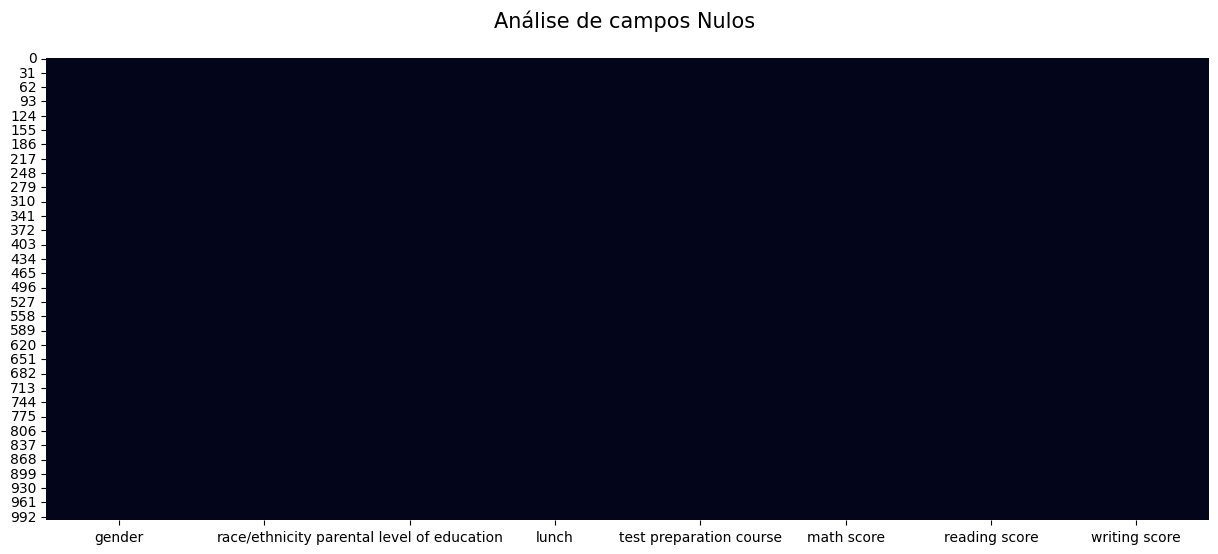

In [5]:
#Analise de campos nulos
Nulos = DataBase.isnull()

#Configurando gráfico para análise de campos nulos
plt.figure(figsize=(15,6))
plt.title('Análise de campos Nulos \n', fontsize=15)
sns.heatmap(Nulos, cbar=False)

In [6]:
#Análise de campos duplicados
DataBase.duplicated().sum()

np.int64(0)

In [7]:
DataBase.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#Verificação de divisão por genero
divGender = DataBase['gender'].value_counts( normalize=True ) * 100
divGender.head().reset_index()

,gender,proportion
0,female,51.8
1,male,48.2


In [11]:
#Verificação de divisão por etinia
divEthnicity = DataBase['race/ethnicity'].value_counts( normalize=True ) * 100
divEthnicity.head().reset_index()

,race/ethnicity,proportion
0,group C,31.9
1,group D,26.2
2,group B,19.0
3,group E,14.0
4,group A,8.9


In [12]:
divEducation = DataBase['parental level of education'].value_counts( normalize=True ) * 100
divEducation.head().reset_index()

,parental level of education,proportion
0,some college,22.6
1,associate's degree,22.2
2,high school,19.6
3,some high school,17.9
4,bachelor's degree,11.8


<Axes: xlabel='math score', ylabel='gender'>

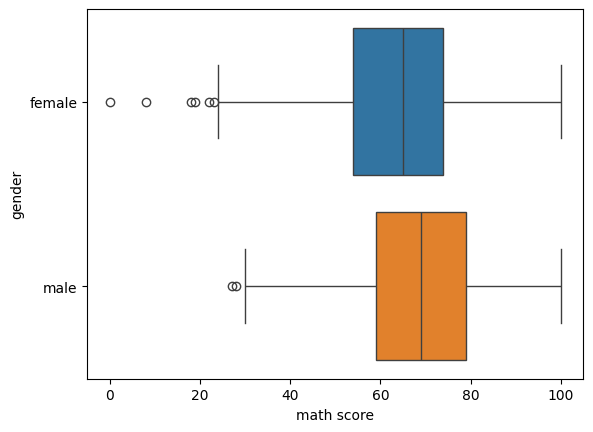

In [13]:
sns.boxplot(data=DataBase, 
            x='math score',
            y='gender',
            hue='gender')

Text(0, 0.5, 'Pontuação Matemática \n')

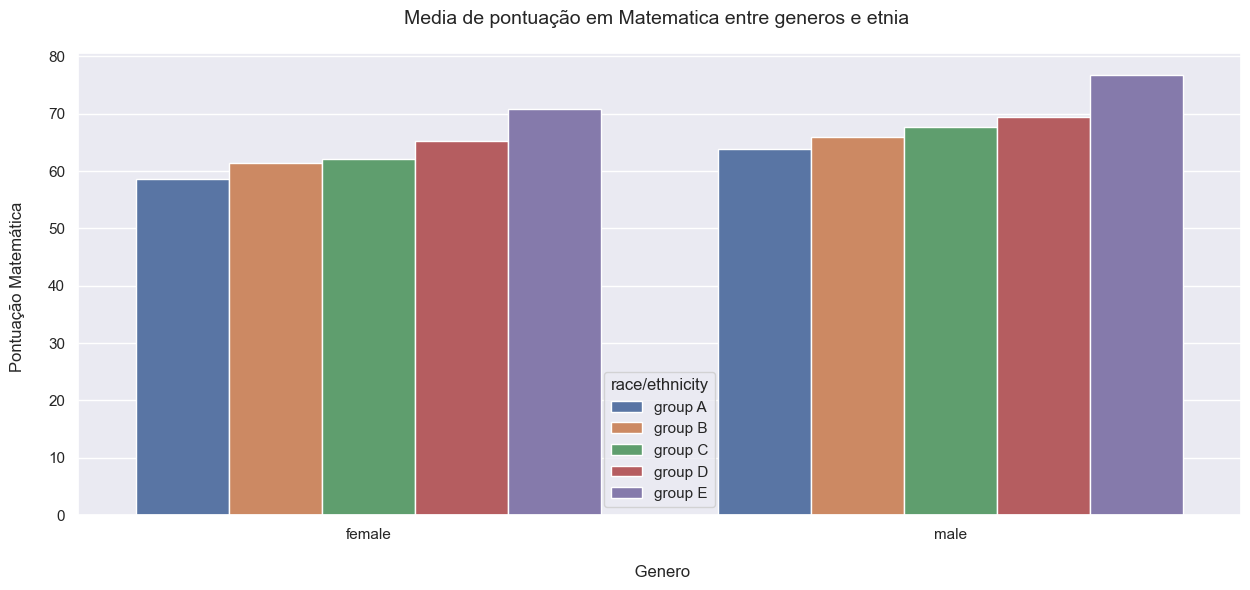

In [40]:
#Dados Media Matematica
ScoreMath = DataBase.groupby(by=['gender', 'race/ethnicity'])['math score'].mean().reset_index()

#Configurando tema do gráfico
sns.set_theme(style='darkgrid')

plt.figure(figsize=(15,6))

#Inserindo os dados no gráfico
sns.barplot(data=ScoreMath,
            x='gender', 
            y='math score', 
            hue='race/ethnicity')

#Realizadno alterações no gráfico
plt.title('Media de pontuação em Matematica entre generos e etnia \n', fontsize=14)
plt.xlabel('\n Genero')
plt.ylabel('Pontuação Matemática \n')

Text(0, 0.5, 'Pontuação Leitura \n')

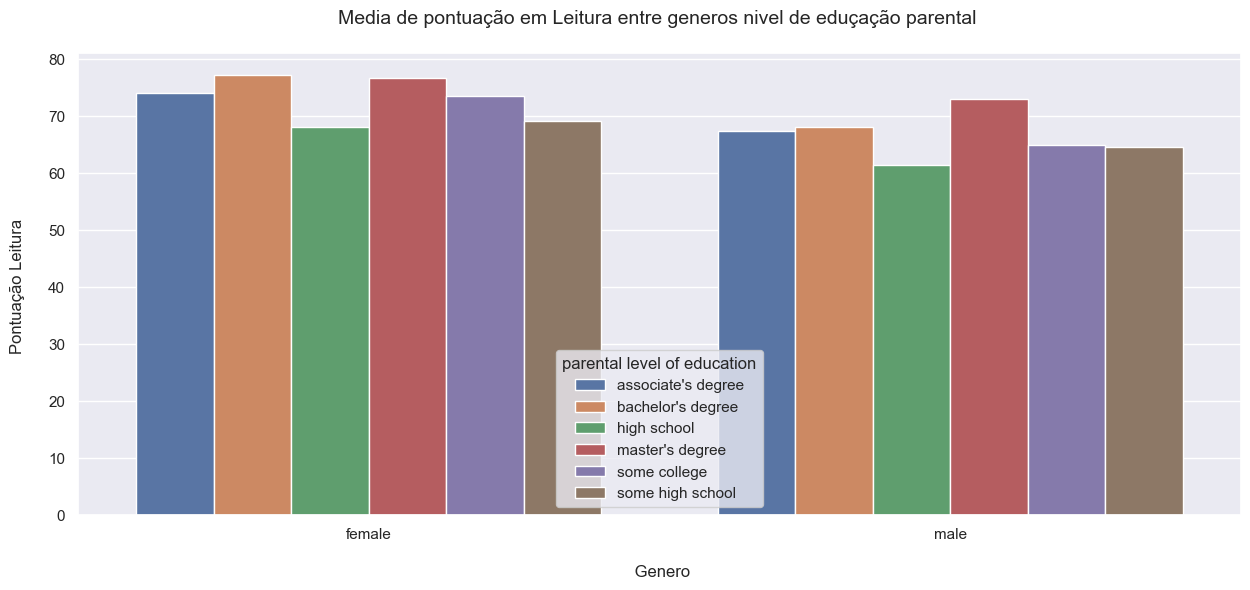

In [41]:
ScoreReading = DataBase.groupby(by=['gender', 'parental level of education'])['reading score'].mean().reset_index()

#Configurando tema do gráfico
sns.set_theme(style='darkgrid')

plt.figure(figsize=(15,6))

#Inserindo os dados no gráfico
sns.barplot(data=ScoreReading,
            x='gender', 
            y='reading score', 
            hue='parental level of education')

#Realizando alterações no gráfico
plt.title('Media de pontuação em Leitura entre generos nivel de eduçação parental \n', fontsize=14)
plt.xlabel('\n Genero')
plt.ylabel('Pontuação Leitura \n')

In [42]:
DataBase.groupby(by='gender')['math score'].describe().reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


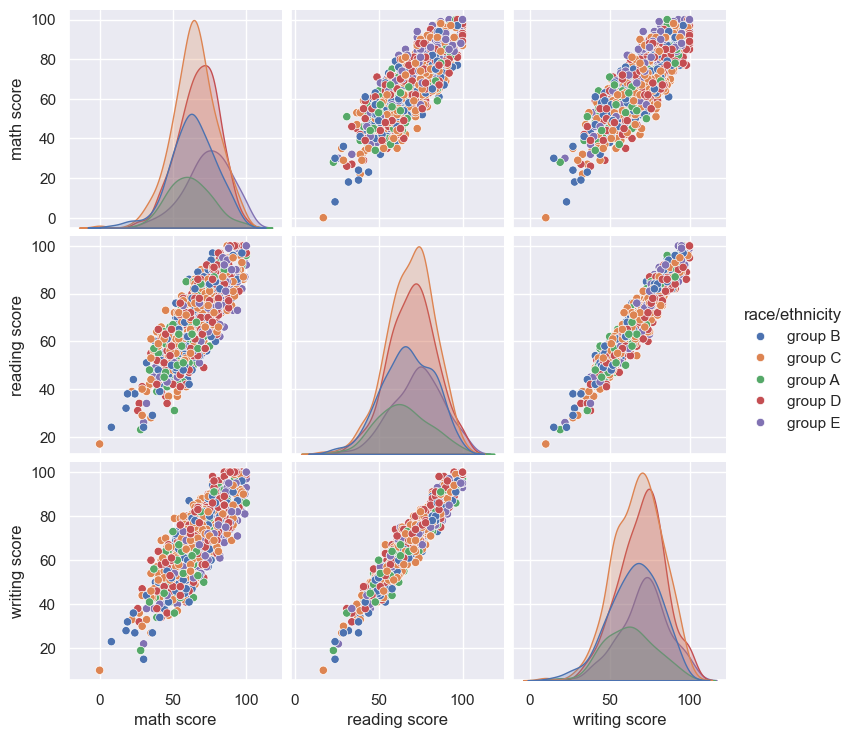

In [45]:
sns.pairplot(DataBase, hue='race/ethnicity')

<Axes: xlabel='math score', ylabel='race/ethnicity'>

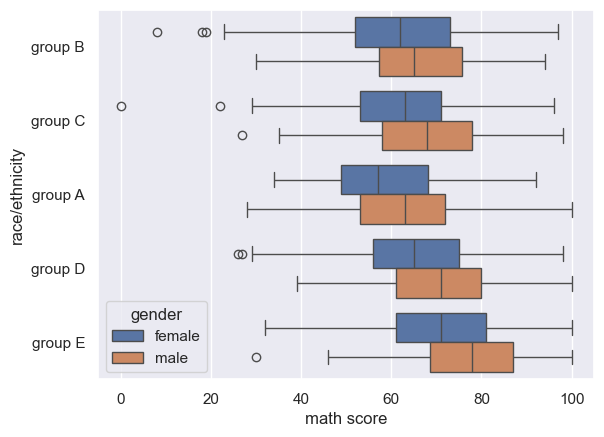

In [47]:
sns.boxplot(data=DataBase, x='math score', y='race/ethnicity', hue='gender')

<Axes: xlabel='math score', ylabel='parental level of education'>

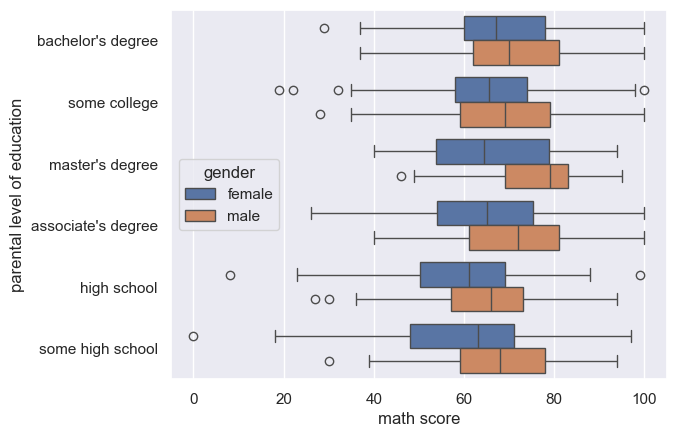

In [48]:
sns.boxplot(data=DataBase, x='math score', y='parental level of education', hue='gender')